## 绘制Markov链转移概率矩阵轨迹图

构造一个三状态的Markov链转移概率矩阵（行和为1的3×3方阵）$P$，计算并绘出多次迭代相乘的轨迹图$P^t$,同时点出转移矩阵转置$P^T$的第一特征向量标准化（除以元素和）的三个点（收敛点）。

[[0.2  0.35 0.45]
 [0.3  0.25 0.45]
 [0.1  0.5  0.4 ]]


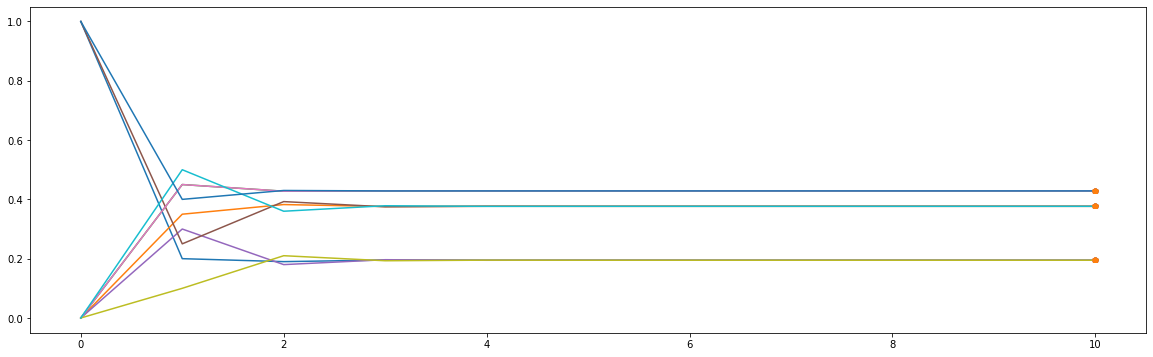

In [9]:
import numpy as np
def iter(x,P,n):
    res=np.zeros((n+1,len(x)))
    res[0,] = x
    for i in range(n):
        x = x.dot(P)
        res[i+1,] = x
    return res
P = np.array([[0.2,0.35,0.45],[0.3,0.25,0.45],[0.1,0.5,0.4]])

x = np.identity(3)
n = 10
y = {}
for i in range(x.shape[1]):
    y[i] = iter(x[i,:],P,n)
ev = np.linalg.eig(P.T)[1][:,0]
ev = ev/ev.sum()

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,6))
for i in range(len(y)):
    plt.plot(y[i])
    plt.plot([10,10,10],ev,'p')

In [ ]:
def run(i,P,n):
    res = []
    for t in range(n):
        i = np.random.choice(P.shape[0],size=1,p=P[int(i)])
        res.append(i)
    return res
np.random.seed(523)
s = run(0,P,100)
fig = plt.figure(figsize=(20,6))
plt.step(range(len(s)),s)

## 从某一状态出发的Markov链状态变化图

绘制Markov链从某一个状态出发根据转移概率在n步中的变化状态。

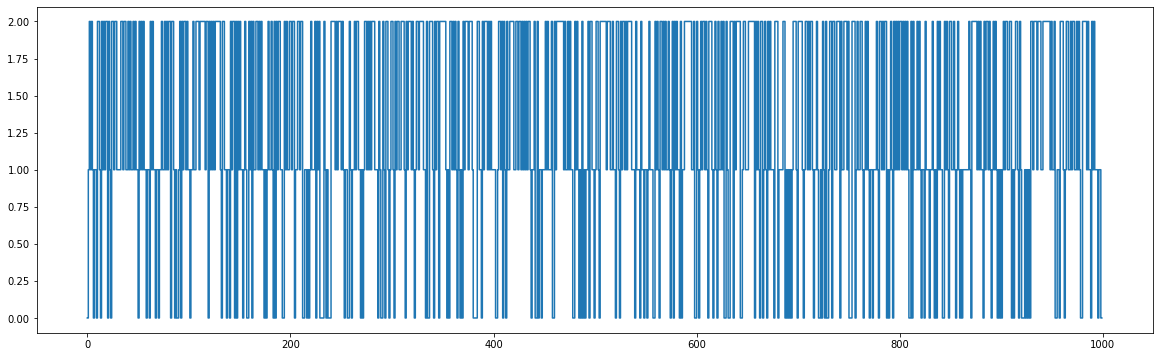

In [13]:
def run(i,P,n):
    res = []
    for t in range(n):
        i = np.random.choice(P.shape[0],size=1,p=P[int(i)])
        res.append(i)
    return res
np.random.seed(523)
s = run(0,P,1000)
fig = plt.figure(figsize=(20,6))
plt.step(range(len(s)),s)

## 在每个状态停留的次数累计比例

计算前面Markov链在每个状态停留次数累计比例。

注：其极限是前面提到过的Markov链转移概率乘积极限矩阵$W=lim_{t\rightarrow \infty}P^{T}$的相同的行$w$。

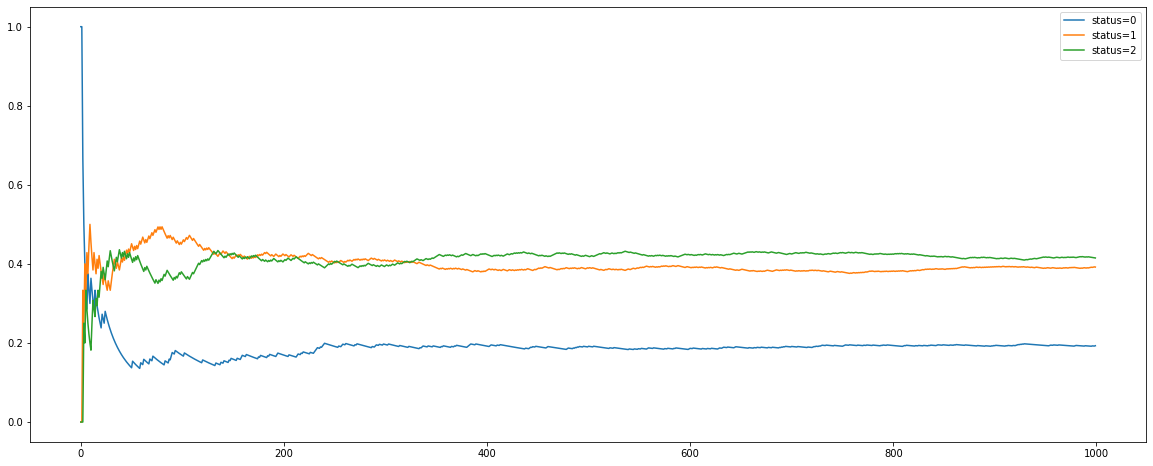

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,8))

for i in np.unique(s):
    ss = np.cumsum(s==i)/np.arange(1,len(s)+1)
    plt.plot(ss,label='status={}'.format(int(i)))
plt.legend(loc='best')